In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

In [ ]:
df_data = pd.read_csv('data/02-1_내국인유동인구_KOREAN.CSV', encoding='cp949')
df_data.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47250196 entries, 0 to 47250195
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   city           object 
 3   emd_cd         int64  
 4   emd_nm         object 
 5   sex            object 
 6   age            int64  
 7   resd_pop_cnt   float64
 8   work_pop_cnt   float64
 9   visit_pop_cnt  float64
 10  resd           object 
dtypes: float64(3), int64(3), object(5)
memory usage: 3.9+ GB


## resd=='제주' 선택하여 데이터셋 생성
- 제주도민의 통계치(대한민국 수도권 등 반영X)

In [ ]:
df = df_data[df_data['resd']=='제주']

<bound method NDFrame.head of            base_date  time  city    emd_cd emd_nm sex  age  resd_pop_cnt  \
0         2018-01-01     1   제주시  50110250    한림읍  여성    0      638.5509   
2         2018-01-01     1   제주시  50110250    한림읍  여성   10      668.4577   
4         2018-01-01     1   제주시  50110250    한림읍  여성   20      609.7710   
6         2018-01-01     1   제주시  50110250    한림읍  여성   30     1002.1208   
8         2018-01-01     1   제주시  50110250    한림읍  여성   40     1530.5014   
...              ...   ...   ...       ...    ...  ..  ...           ...   
47250188  2021-06-30    24  서귀포시  50130620    예래동  남성   40      323.9345   
47250190  2021-06-30    24  서귀포시  50130620    예래동  남성   30      224.0900   
47250192  2021-06-30    24  서귀포시  50130620    예래동  남성   20      187.5990   
47250193  2021-06-30    24  서귀포시  50130620    예래동  남성   10      121.8467   
47250194  2021-06-30    24  서귀포시  50130620    예래동  남성   80      122.2190   

          work_pop_cnt  visit_pop_cnt resd  
0           

In [ ]:
df.shape

(23721159, 11)

In [ ]:
# 지역 확인
len(df['emd_nm'].unique()), df['emd_nm'].unique()

(43,
 array(['한림읍', '애월읍', '구좌읍', '조천읍', '한경면', '추자면', '우도면', '일도1동', '일도2동',
        '이도1동', '이도2동', '삼도1동', '삼도2동', '용담1동', '용담2동', '건입동', '화북동',
        '삼양동', '봉개동', '아라동', '오라동', '연동', '노형동', '외도동', '이호동', '도두동',
        '대정읍', '남원읍', '성산읍', '안덕면', '표선면', '송산동', '정방동', '중앙동', '천지동',
        '효돈동', '영천동', '동홍동', '서홍동', '대륜동', '대천동', '중문동', '예래동'],
       dtype=object))

In [ ]:
df.drop('resd', axis=1, inplace=True)
df.head(3)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246


In [ ]:
df['base_date'] = pd.to_datetime(df['base_date'])

<ipython-input-18-f70477c120be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['base_date'] = pd.to_datetime(df['base_date'])


In [ ]:
# df['base_date'].min(), df['base_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2021-06-30 00:00:00'))

In [ ]:
df.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246
6,2018-01-01,1,제주시,50110250,한림읍,여성,30,1002.1208,10.1911,217.4093
8,2018-01-01,1,제주시,50110250,한림읍,여성,40,1530.5014,38.2625,292.1866


In [ ]:
df['resd_pop_cnt'] = round(df['resd_pop_cnt']).astype('int64')
df['work_pop_cnt'] = round(df['work_pop_cnt']).astype('int64')
df['visit_pop_cnt'] = round(df['visit_pop_cnt']).astype('int64')

<ipython-input-21-5d2d49c13f33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resd_pop_cnt'] = round(df['resd_pop_cnt']).astype('int64')
<ipython-input-21-5d2d49c13f33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_pop_cnt'] = round(df['work_pop_cnt']).astype('int64')
<ipython-input-21-5d2d49c13f33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
df['year'] = df['base_date'].dt.year
df['month'] = df['base_date'].dt.month
df['day'] = df['base_date'].dt.day
df['day_name'] = df['base_date'].dt.day_name()
df.tail(3)

<ipython-input-22-754f74130b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['base_date'].dt.year
<ipython-input-22-754f74130b28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['base_date'].dt.month
<ipython-input-22-754f74130b28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,year,month,day,day_name
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,188,42,76,2021,6,30,Wednesday
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,122,0,5,2021,6,30,Wednesday
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122,0,5,2021,6,30,Wednesday


In [ ]:
df['year'] = df['base_date'].dt.year
df['month'] = df['base_date'].dt.month
df['day'] = df['base_date'].dt.day
df['day_name'] = df['base_date'].dt.day_name()
df.tail(3)

<ipython-input-23-754f74130b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['base_date'].dt.year
<ipython-input-23-754f74130b28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['base_date'].dt.month
<ipython-input-23-754f74130b28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,year,month,day,day_name
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,188,42,76,2021,6,30,Wednesday
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,122,0,5,2021,6,30,Wednesday
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122,0,5,2021,6,30,Wednesday


In [ ]:
df['weekend'] = np.where((df['day_name']=='Saturday')|(df['day_name']=='Sunday'), 1, 0)
df['weekend'] = df['weekend'].astype('int64')

<ipython-input-24-bb724a00a638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekend'] = np.where((df['day_name']=='Saturday')|(df['day_name']=='Sunday'), 1, 0)
<ipython-input-24-bb724a00a638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekend'] = df['weekend'].astype('int64')


In [ ]:
df.isnull().sum()

base_date        0
time             0
city             0
emd_cd           0
emd_nm           0
sex              0
age              0
resd_pop_cnt     0
work_pop_cnt     0
visit_pop_cnt    0
year             0
month            0
day              0
day_name         0
weekend          0
dtype: int64

In [ ]:
test01 = df.groupby(['year', 'month', 'day', 'time', 'city', 'emd_cd', 'emd_nm', 'sex']).max()
test01

base_date  age  resd_pop_cnt  \
year month day time city emd_cd   emd_nm sex                                 
2018 1     1   1    서귀포시 50130250 대정읍    남성  2018-01-01   80          1858   
                                         여성  2018-01-01   80          1577   
                         50130253 남원읍    남성  2018-01-01   80          1591   
                                         여성  2018-01-01   80          1140   
                         50130259 성산읍    남성  2018-01-01   80          1683   
...                                                 ...  ...           ...   
2021 6     30  24   제주시  50110670 외도동    여성  2021-06-30   80          1874   
                         50110680 이호동    남성  2021-06-30   80           401   
                                         여성  2021-06-30   80           390   
                         50110690 도두동    남성  2021-06-30   80           184   
                                         여성  2021-06-30   80           163   

                                              work_pop_cnt  visit_pop_cnt  \
year month day time city emd_cd   emd_nm sex                                
2018 1     1   1    서귀포시 50130250 대정읍    남성             42            295   
                                         여성             45            262   
                         50130253 남원읍    남성             56            236   
                                         여성             31            243   
                         50130259 성산읍    남성             93            542   
...                                                    ...            ...   
2021 6     30  24   제주시  50110670 외도동    여성             41            133   
                         50110680 이호동    남성             13            353   
                                         여성             14            266   
                         50110690 도두동    남성             16             91   
                                         여성              9             46   

                                               day_name  weekend  
year month day time city emd_cd   emd_nm sex                      
2018 1     1   1    서귀포시 50130250 대정읍    남성      Monday        0  
                                         여성      Monday        0  
                         50130253 남원읍    남성      Monday        0  
                                         여성      Monday        0  
                         50130259 성산읍    남성      Monday        0  
...                                                 ...      ...  
2021 6     30  24   제주시  50110670 외도동    여성   Wednesday        0  
                         50110680 이호동    남성   Wednesday        0  
                                         여성   Wednesday        0  
                         50110690 도두동    남성   Wednesday        0  
                                         여성   Wednesday        0  

[2635728 rows x 7 columns]

In [ ]:
df.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,year,month,day,day_name,weekend
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,639,16,152,2018,1,1,Monday,0
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668,17,166,2018,1,1,Monday,0
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,610,6,149,2018,1,1,Monday,0
6,2018-01-01,1,제주시,50110250,한림읍,여성,30,1002,10,217,2018,1,1,Monday,0
8,2018-01-01,1,제주시,50110250,한림읍,여성,40,1531,38,292,2018,1,1,Monday,0


In [ ]:
df1 = df[['year', 'month', 'day', 'time', 'day_name', 'weekend',
     'city', 'emd_cd', 'emd_nm', 'sex', 'age', 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']]
df1.head()

,year,month,day,time,day_name,weekend,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,1,1,Monday,0,제주시,50110250,한림읍,여성,0,639,16,152
2,2018,1,1,1,Monday,0,제주시,50110250,한림읍,여성,10,668,17,166
4,2018,1,1,1,Monday,0,제주시,50110250,한림읍,여성,20,610,6,149
6,2018,1,1,1,Monday,0,제주시,50110250,한림읍,여성,30,1002,10,217
8,2018,1,1,1,Monday,0,제주시,50110250,한림읍,여성,40,1531,38,292


In [ ]:
test01 = df1.groupby(['year', 'month', 'day', 'time', 'day_name', 'city', 'emd_cd', 'emd_nm', 'weekend']).sum()
test01

age  resd_pop_cnt  \
year month day time day_name  city emd_cd   emd_nm weekend                      
2018 1     1   1    Monday    서귀포시 50130250 대정읍    0        720         16030   
                                   50130253 남원읍    0        720         12779   
                                   50130259 성산읍    0        720         12252   
                                   50130310 안덕면    0        720         10823   
                                   50130320 표선면    0        720          8377   
...                                                         ...           ...   
2021 6     30  24   Wednesday 제주시  50110650 연동     0        720         55360   
                                   50110660 노형동    0        720         63153   
                                   50110670 외도동    0        720         18281   
                                   50110680 이호동    0        720          4286   
                                   50110690 도두동    0        720          1730   

                                                            work_pop_cnt  \
year month day time day_name  city emd_cd   emd_nm weekend                 
2018 1     1   1    Monday    서귀포시 50130250 대정읍    0                 338   
                                   50130253 남원읍    0                 377   
                                   50130259 성산읍    0                 501   
                                   50130310 안덕면    0                 808   
                                   50130320 표선면    0                 320   
...                                                                  ...   
2021 6     30  24   Wednesday 제주시  50110650 연동     0                1394   
                                   50110660 노형동    0                1521   
                                   50110670 외도동    0                 364   
                                   50110680 이호동    0                 111   
                                   50110690 도두동    0                  53   

                                                            visit_pop_cnt  
year month day time day_name  city emd_cd   emd_nm weekend                 
2018 1     1   1    Monday    서귀포시 50130250 대정읍    0                 2736  
                                   50130253 남원읍    0                 2549  
                                   50130259 성산읍    0                 5113  
                                   50130310 안덕면    0                 6427  
                                   50130320 표선면    0                 2486  
...                                                                   ...  
2021 6     30  24   Wednesday 제주시  50110650 연동     0                 6256  
                                   50110660 노형동    0                 4938  
                                   50110670 외도동    0                 1529  
                                   50110680 이호동    0                 1710  
                                   50110690 도두동    0                  565  

[1317864 rows x 4 columns]

### 그룹 집계함수 실행한 결과 - dataframe으로 활용하기

In [ ]:
test02 = test01.reset_index()

In [ ]:
test02[test02['day_name']=='Monday'].head(10)

,year,month,day,time,day_name,city,emd_cd,emd_nm,weekend,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,1,1,Monday,서귀포시,50130250,대정읍,0,720,16030,338,2736
1,2018,1,1,1,Monday,서귀포시,50130253,남원읍,0,720,12779,377,2549
2,2018,1,1,1,Monday,서귀포시,50130259,성산읍,0,720,12252,501,5113
3,2018,1,1,1,Monday,서귀포시,50130310,안덕면,0,720,10823,808,6427
4,2018,1,1,1,Monday,서귀포시,50130320,표선면,0,720,8377,320,2486
5,2018,1,1,1,Monday,서귀포시,50130510,송산동,0,720,2174,57,580
6,2018,1,1,1,Monday,서귀포시,50130520,정방동,0,720,2371,310,3296
7,2018,1,1,1,Monday,서귀포시,50130530,중앙동,0,720,2545,390,1873
8,2018,1,1,1,Monday,서귀포시,50130540,천지동,0,720,1089,31,523
9,2018,1,1,1,Monday,서귀포시,50130550,효돈동,0,720,4295,76,531


In [ ]:
test02.shape

(1317864, 13)

In [ ]:
test02.drop('age', axis=1, inplace=True)

,year,month,day,time,day_name,city,emd_cd,emd_nm,weekend,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,1,1,Monday,서귀포시,50130250,대정읍,0,16030,338,2736
1,2018,1,1,1,Monday,서귀포시,50130253,남원읍,0,12779,377,2549
2,2018,1,1,1,Monday,서귀포시,50130259,성산읍,0,12252,501,5113


In [ ]:
test02.head(10)

,year,month,day,time,day_name,city,emd_cd,emd_nm,weekend,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,1,1,Monday,서귀포시,50130250,대정읍,0,16030,338,2736
1,2018,1,1,1,Monday,서귀포시,50130253,남원읍,0,12779,377,2549
2,2018,1,1,1,Monday,서귀포시,50130259,성산읍,0,12252,501,5113
3,2018,1,1,1,Monday,서귀포시,50130310,안덕면,0,10823,808,6427
4,2018,1,1,1,Monday,서귀포시,50130320,표선면,0,8377,320,2486
5,2018,1,1,1,Monday,서귀포시,50130510,송산동,0,2174,57,580
6,2018,1,1,1,Monday,서귀포시,50130520,정방동,0,2371,310,3296
7,2018,1,1,1,Monday,서귀포시,50130530,중앙동,0,2545,390,1873
8,2018,1,1,1,Monday,서귀포시,50130540,천지동,0,1089,31,523
9,2018,1,1,1,Monday,서귀포시,50130550,효돈동,0,4295,76,531


## 지역별 인구 boxplot

<AxesSubplot:xlabel='emd_nm', ylabel='resd_pop_cnt'>

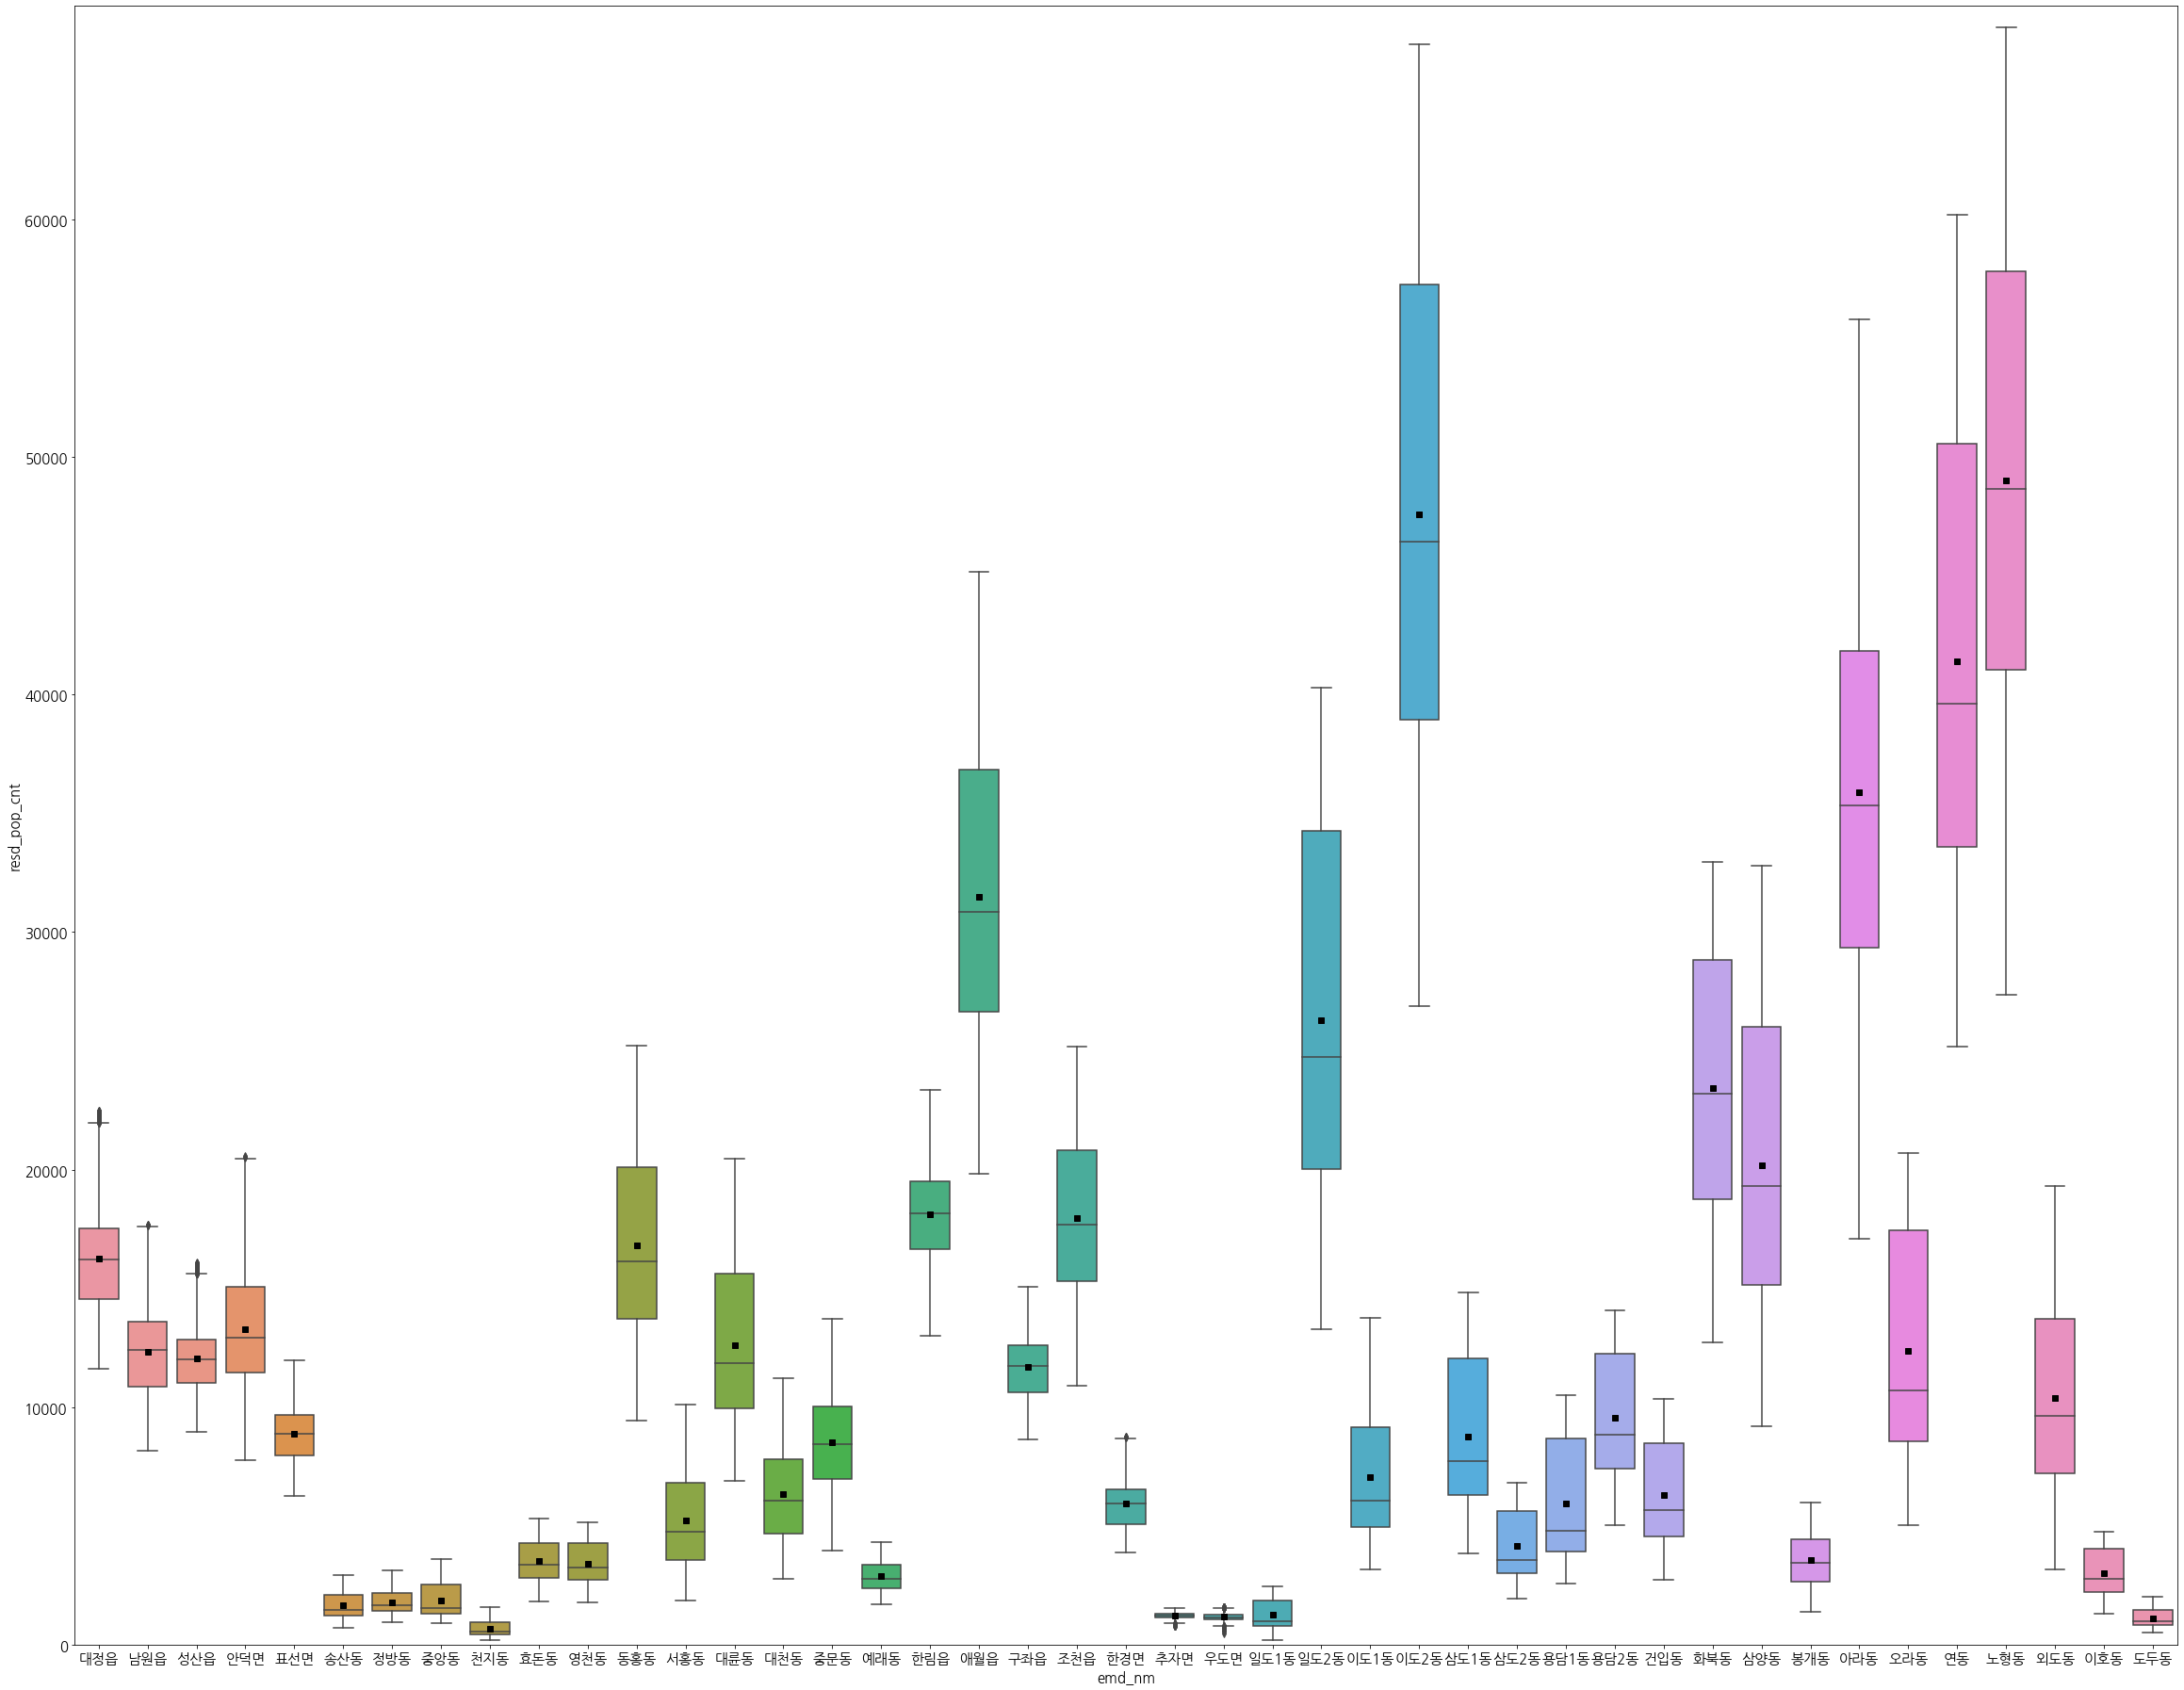

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## boxplot
figure = plt.figure(figsize=(40, 32))
plt.rcParams.update({'font.size': 15})
plt.ylim(0, 69000)
sns.boxplot(x="emd_nm", y="resd_pop_cnt", data=test02, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

In [ ]:
# matplot, seaborn 한국말 깨짐 현상 해결
plt.rcParams['font.family'] = 'NanumGothic'

<AxesSubplot:xlabel='emd_nm', ylabel='work_pop_cnt'>

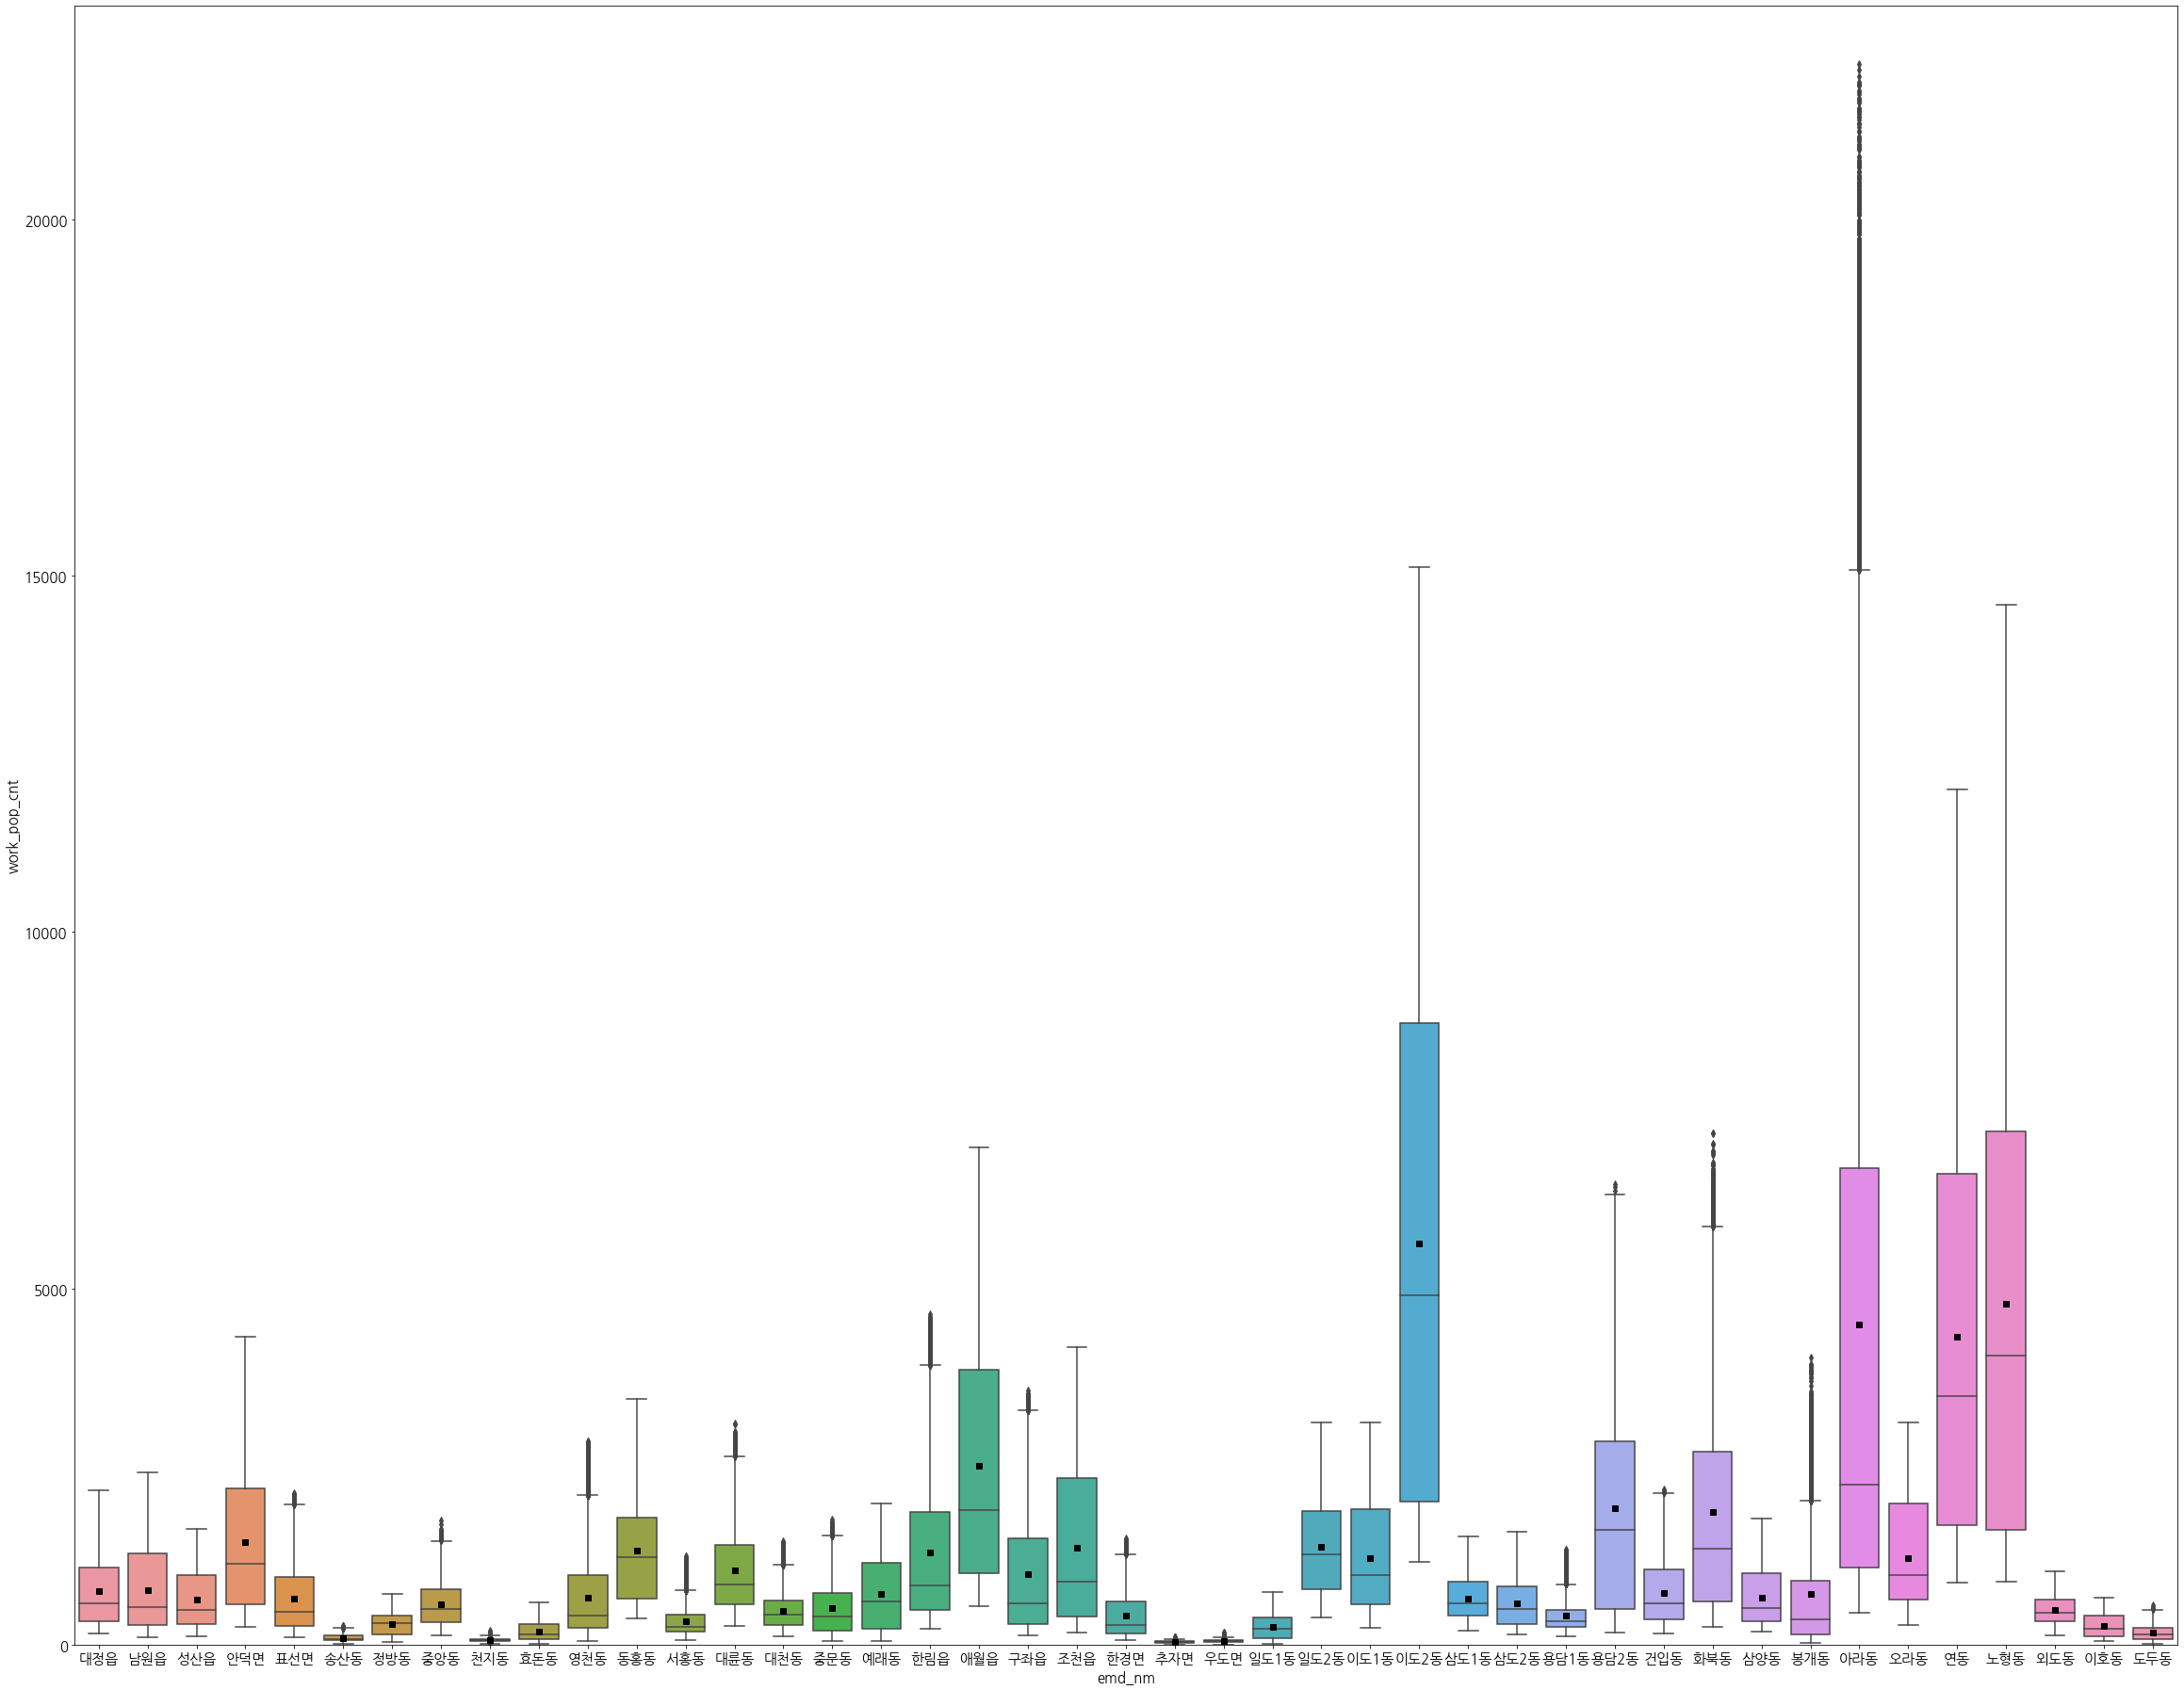

In [ ]:
## boxplot
figure = plt.figure(figsize=(40, 32))
plt.rcParams.update({'font.size': 15})
plt.ylim(0, 23000)
sns.boxplot(x="emd_nm", y="work_pop_cnt", data=test02, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

<AxesSubplot:xlabel='emd_nm', ylabel='visit_pop_cnt'>

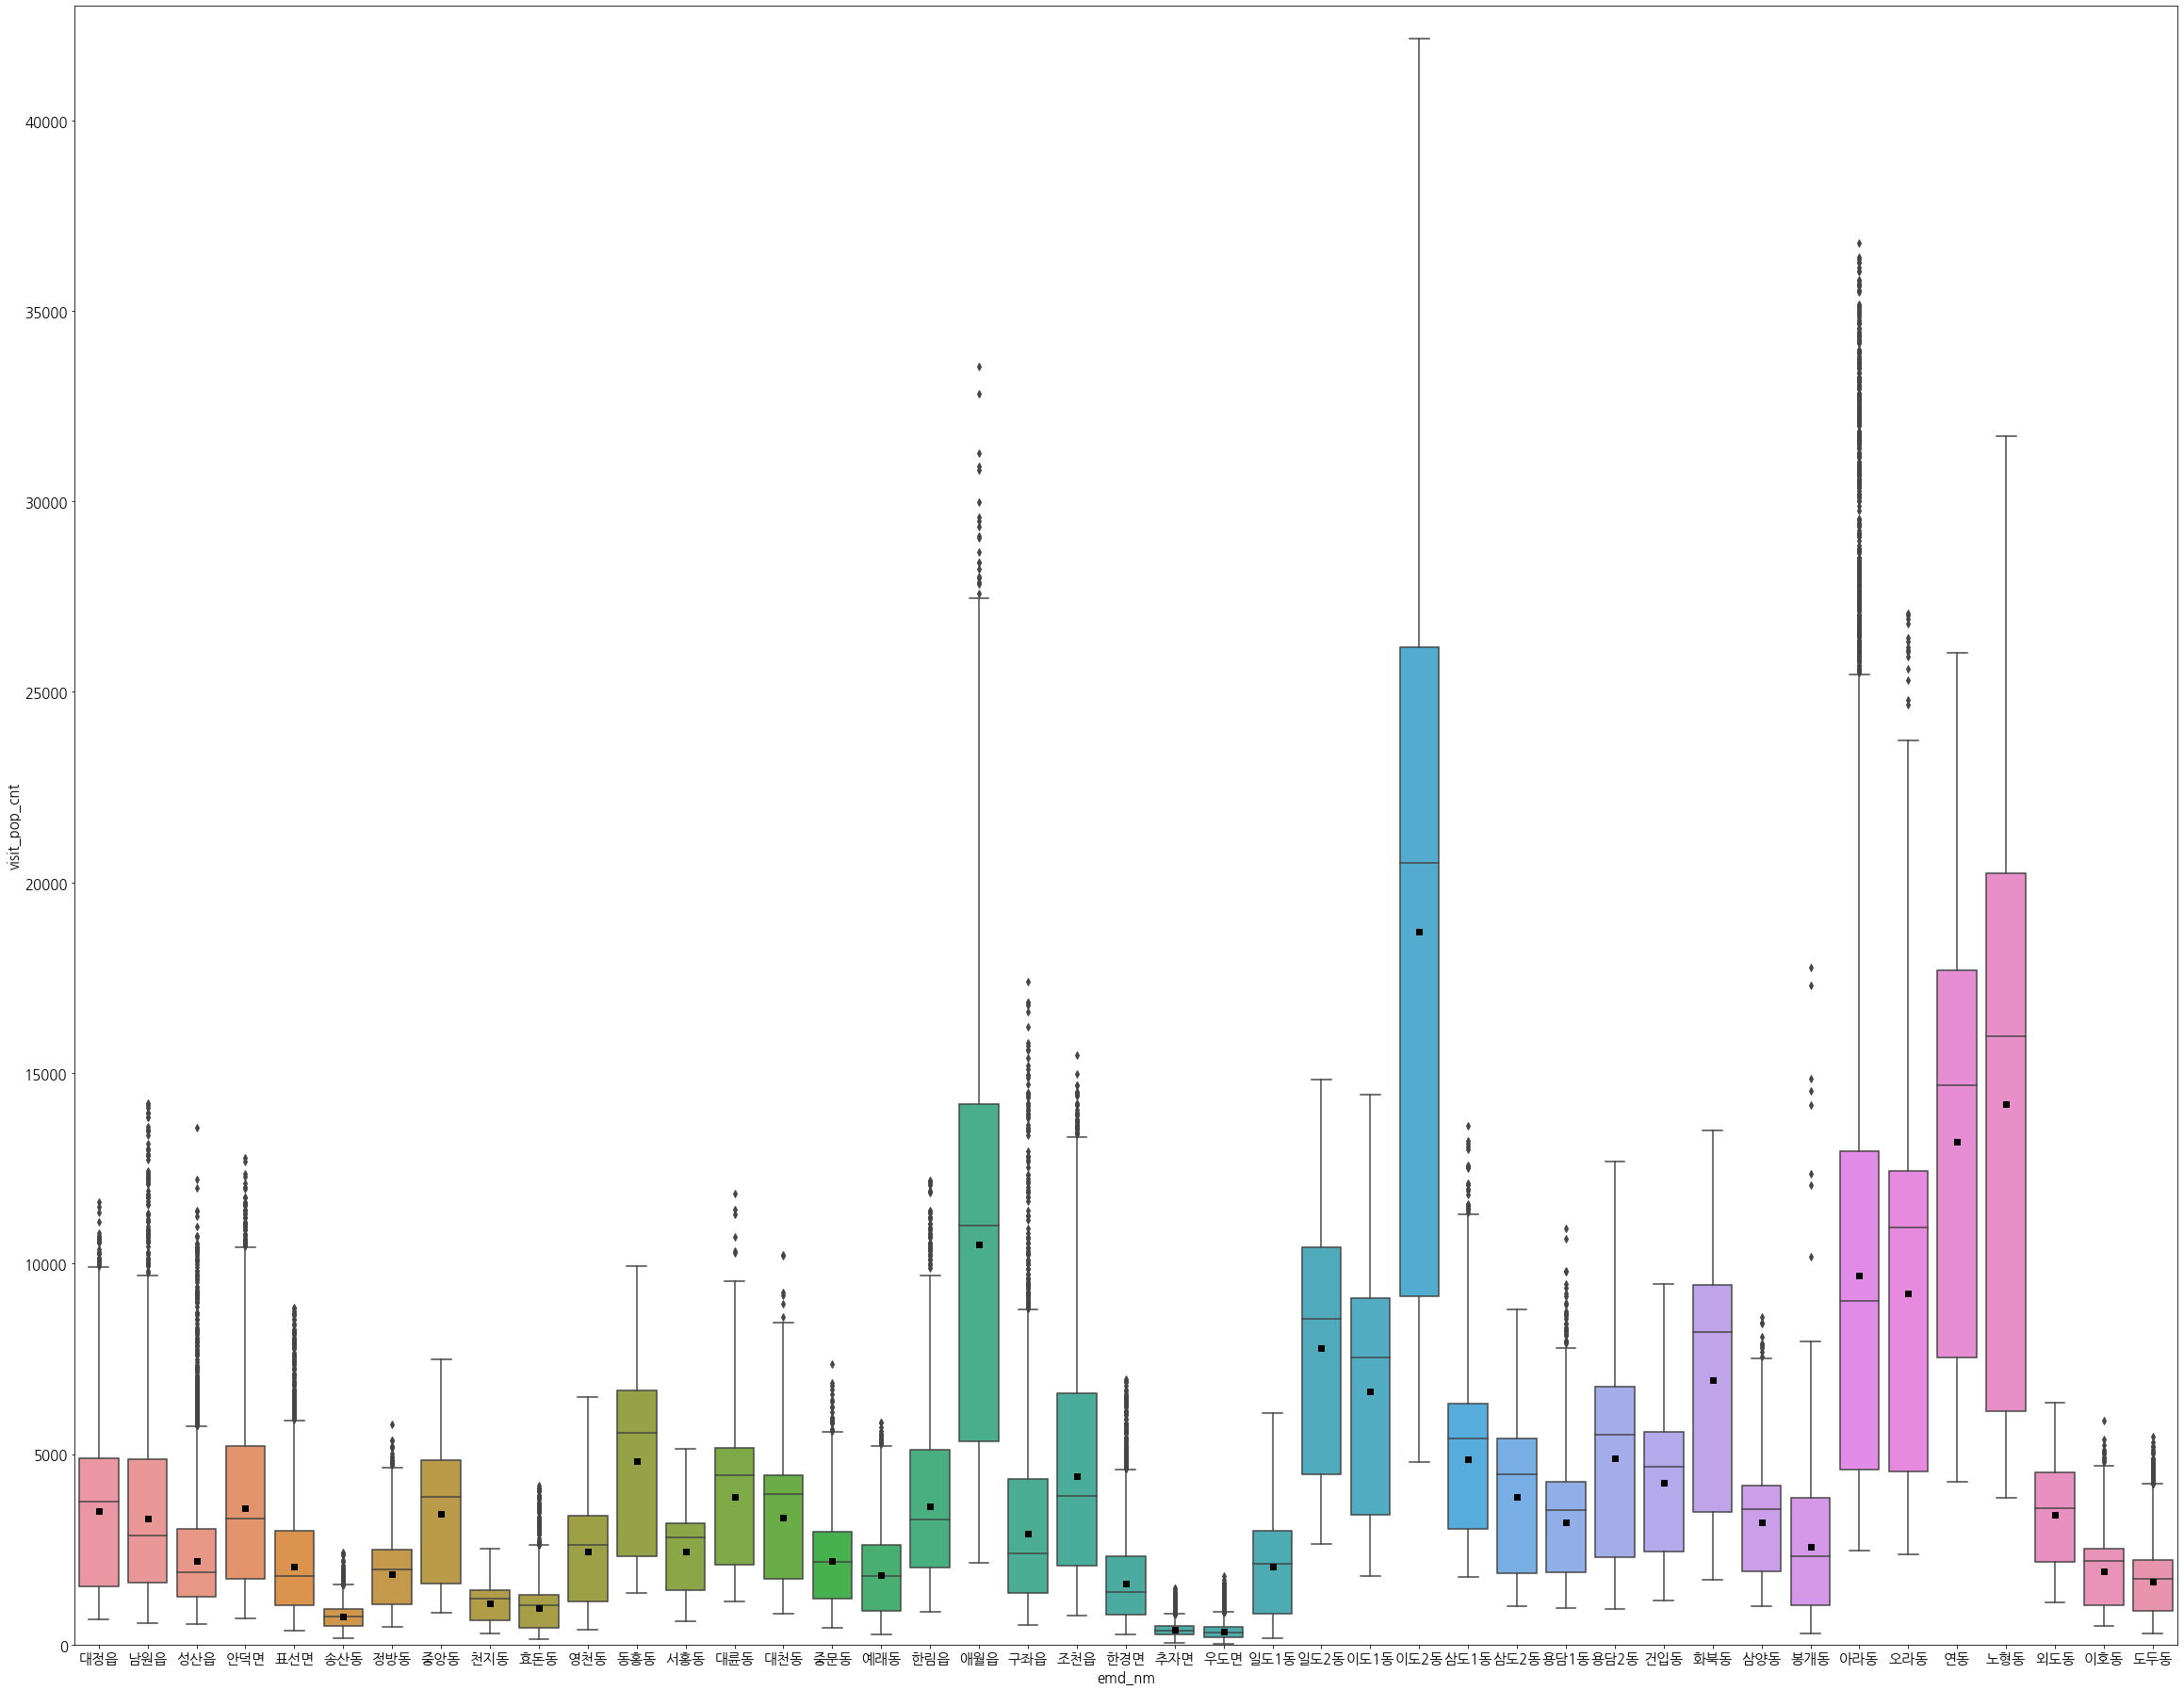

In [ ]:
## boxplot
figure = plt.figure(figsize=(40, 32))
plt.rcParams.update({'font.size': 15})
plt.ylim(0, 43000)
sns.boxplot(x="emd_nm", y="visit_pop_cnt", data=test02, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

## 시간대별로 유동인구 움직임 보기

In [ ]:
test02.head()

,year,month,day,time,day_name,city,emd_cd,emd_nm,weekend,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,1,1,Monday,서귀포시,50130250,대정읍,0,16030,338,2736
1,2018,1,1,1,Monday,서귀포시,50130253,남원읍,0,12779,377,2549
2,2018,1,1,1,Monday,서귀포시,50130259,성산읍,0,12252,501,5113
3,2018,1,1,1,Monday,서귀포시,50130310,안덕면,0,10823,808,6427
4,2018,1,1,1,Monday,서귀포시,50130320,표선면,0,8377,320,2486


제주/서귀포 나눠서<br>
전체 연도별 1시~24시

In [ ]:
test18 = test02[test02['year']==2018]
test18 = test18.groupby(['time']).sum()
test18

,year,month,day,emd_cd,weekend,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,,,,,,,,
1,31672510,102426,246734,786608415750,4472,238443482,6349029,30399857
2,31672510,102426,246734,786608415750,4472,239171702,6019152,29954286
3,31672510,102426,246734,786608415750,4472,239596082,5828776,29696878
4,31672510,102426,246734,786608415750,4472,239693706,5741971,29684075
5,31672510,102426,246734,786608415750,4472,238870066,5783884,30453071
6,31672510,102426,246734,786608415750,4472,235467477,6231606,33399662
7,31672510,102426,246734,786608415750,4472,226443019,7646590,40988511
8,31672510,102426,246734,786608415750,4472,202763980,15180055,56996123
9,31672510,102426,246734,786608415750,4472,176949166,26178676,71533971


In [ ]:
print(test18['resd_pop_cnt'])

time
1     238443482
2     239171702
3     239596082
4     239693706
5     238870066
6     235467477
7     226443019
8     202763980
9     176949166
10    162412409
11    152657857
12    146031379
13    141483321
14    137718455
15    135964396
16    136725226
17    140491171
18    148548050
19    157119747
20    162933671
21    169272954
22    177722011
23    185269570
24    236614184
Name: resd_pop_cnt, dtype: int64


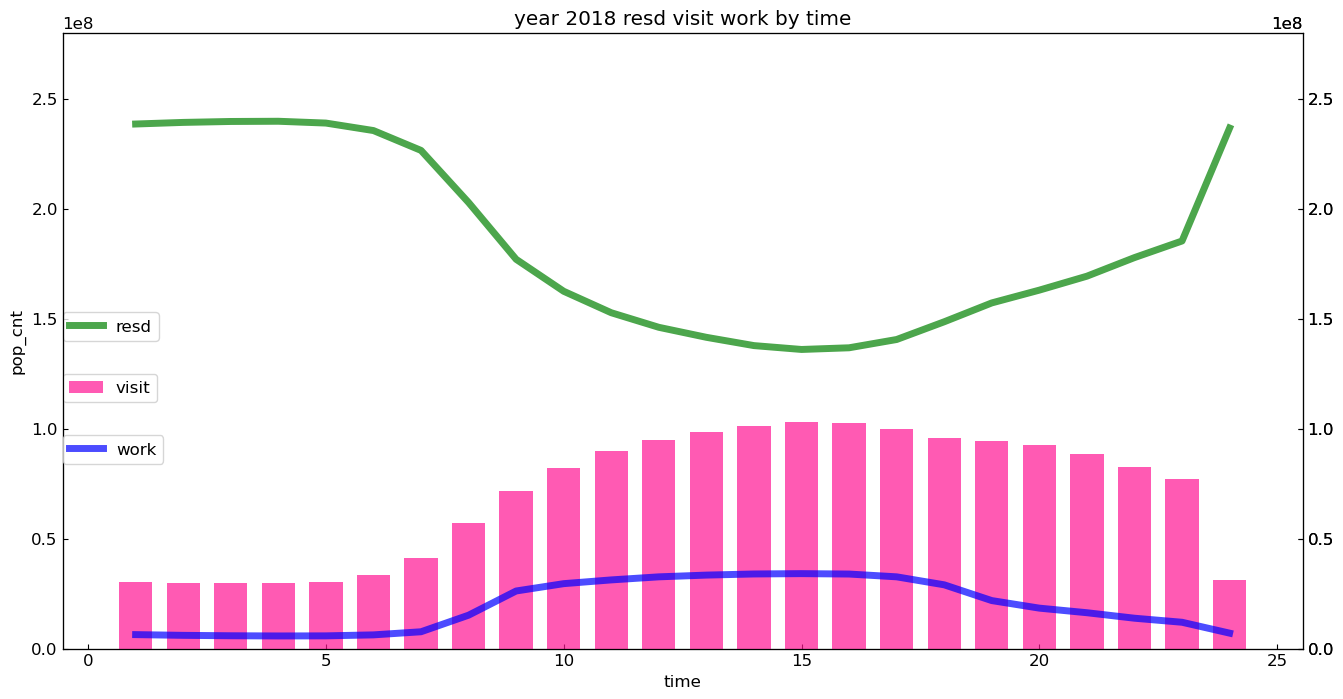

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test18['resd_pop_cnt'])
y2 = np.array(test18['visit_pop_cnt'])
y3 = np.array(test18['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 280000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 280000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 280000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2018 resd visit work by time')
plt.show()

In [ ]:
test19 = test02[test02['year']==2019]
test19 = test19.groupby(['time']).sum()
test19

,year,month,day,emd_cd,weekend,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,,,,,,,,
1,31688205,102426,246734,786608415750,4472,239543368,6496603,30625049
2,31688205,102426,246734,786608415750,4472,240106294,6203986,30276059
3,31688205,102426,246734,786608415750,4472,240418144,6032525,30086961
4,31688205,102426,246734,786608415750,4472,240443502,5956787,30114039
5,31688205,102426,246734,786608415750,4472,239471466,6010811,31033134
6,31688205,102426,246734,786608415750,4472,235919864,6430896,34166849
7,31688205,102426,246734,786608415750,4472,227206265,7710815,41629562
8,31688205,102426,246734,786608415750,4472,204453916,14826576,57141997
9,31688205,102426,246734,786608415750,4472,178490823,25571154,71991325


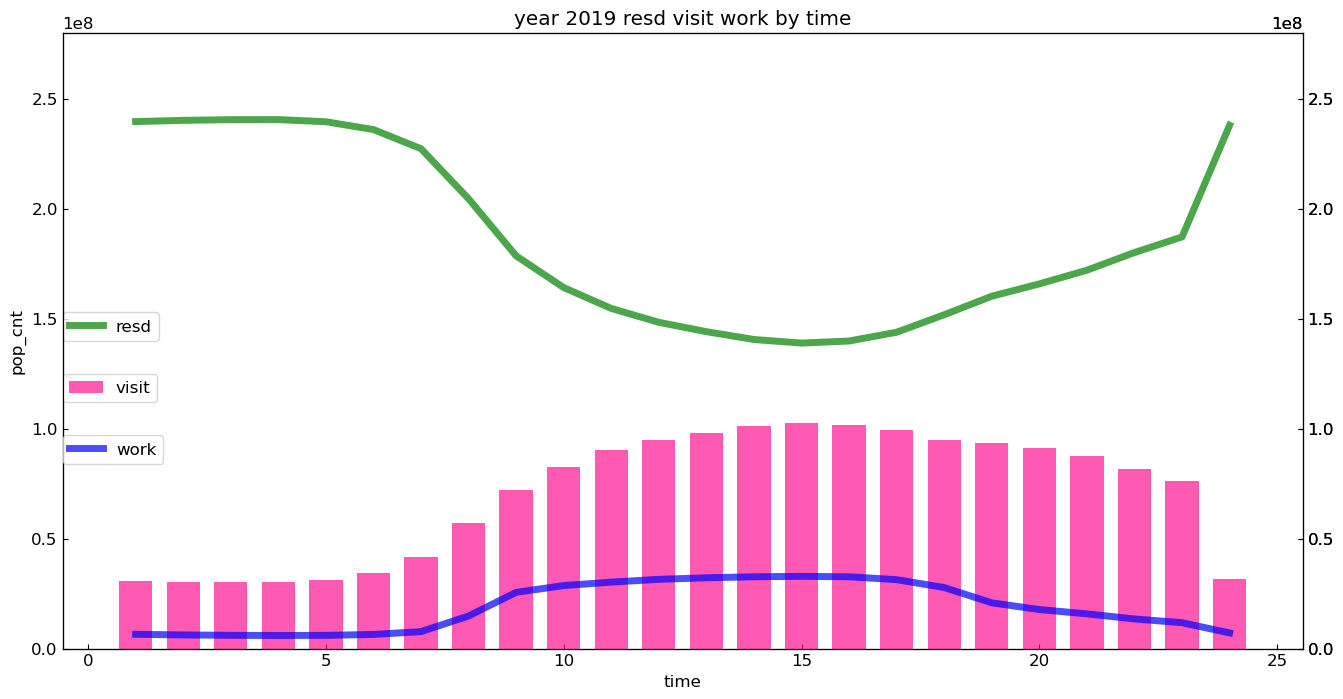

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test19['resd_pop_cnt'])
y2 = np.array(test19['visit_pop_cnt'])
y3 = np.array(test19['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 280000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 280000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 280000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2019 resd visit work by time')
plt.show()

In [ ]:
test20 = test02[test02['year']==2020]
test20 = test20.groupby(['time']).sum()
test20

,year,month,day,emd_cd,weekend,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,,,,,,,,
1,31790760,102512,247981,788763507300,4472,249000269,6373074,29776546
2,31790760,102512,247981,788763507300,4472,249136349,6118554,29873656
3,31790760,102512,247981,788763507300,4472,249215788,5977467,29920589
4,31790760,102512,247981,788763507300,4472,249126143,5909042,30080186
5,31790760,102512,247981,788763507300,4472,247936416,5927641,31272169
6,31790760,102512,247981,788763507300,4472,244474728,6243095,34410654
7,31790760,102512,247981,788763507300,4472,236419862,7403270,41286368
8,31790760,102512,247981,788763507300,4472,217860841,12443949,54698616
9,31790760,102512,247981,788763507300,4472,195171898,21119194,68456910


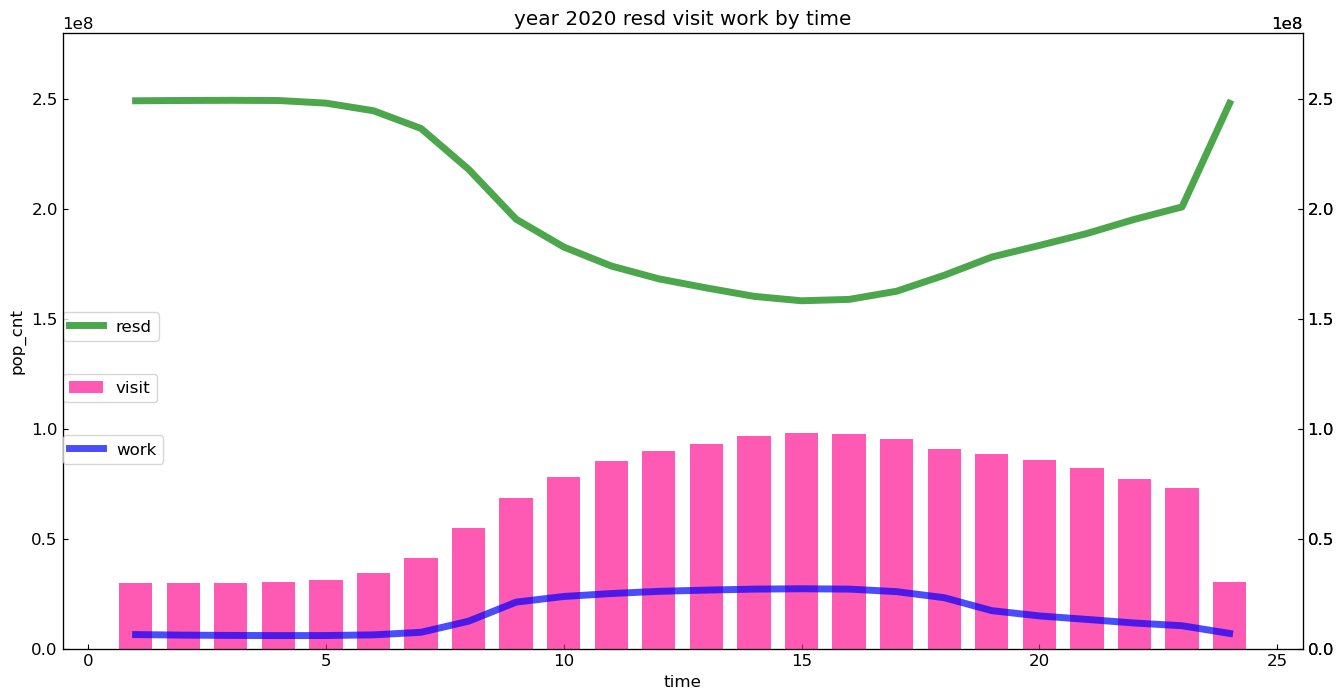

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test20['resd_pop_cnt'])
y2 = np.array(test20['visit_pop_cnt'])
y3 = np.array(test20['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 280000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 280000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 280000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2020 resd visit work by time')
plt.show()

In [ ]:
test21 = test02[test02['year']==2021]
test21 = test21.groupby(['time']).sum()
test21

,year,month,day,emd_cd,weekend,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,,,,,,,,
1,15729443,27305,121432,390071570550,2236,134963428,2992268,13656693
2,15729443,27305,121432,390071570550,2236,134792433,2890282,13923802
3,15729443,27305,121432,390071570550,2236,134698070,2839219,14060437
4,15729443,27305,121432,390071570550,2236,134550506,2815585,14230537
5,15729443,27305,121432,390071570550,2236,133847130,2832314,14920442
6,15729443,27305,121432,390071570550,2236,131876234,3026709,16697819
7,15729443,27305,121432,390071570550,2236,127455619,3642450,20483424
8,15729443,27305,121432,390071570550,2236,116639710,6380452,28481944
9,15729443,27305,121432,390071570550,2236,104079237,10996576,36272965


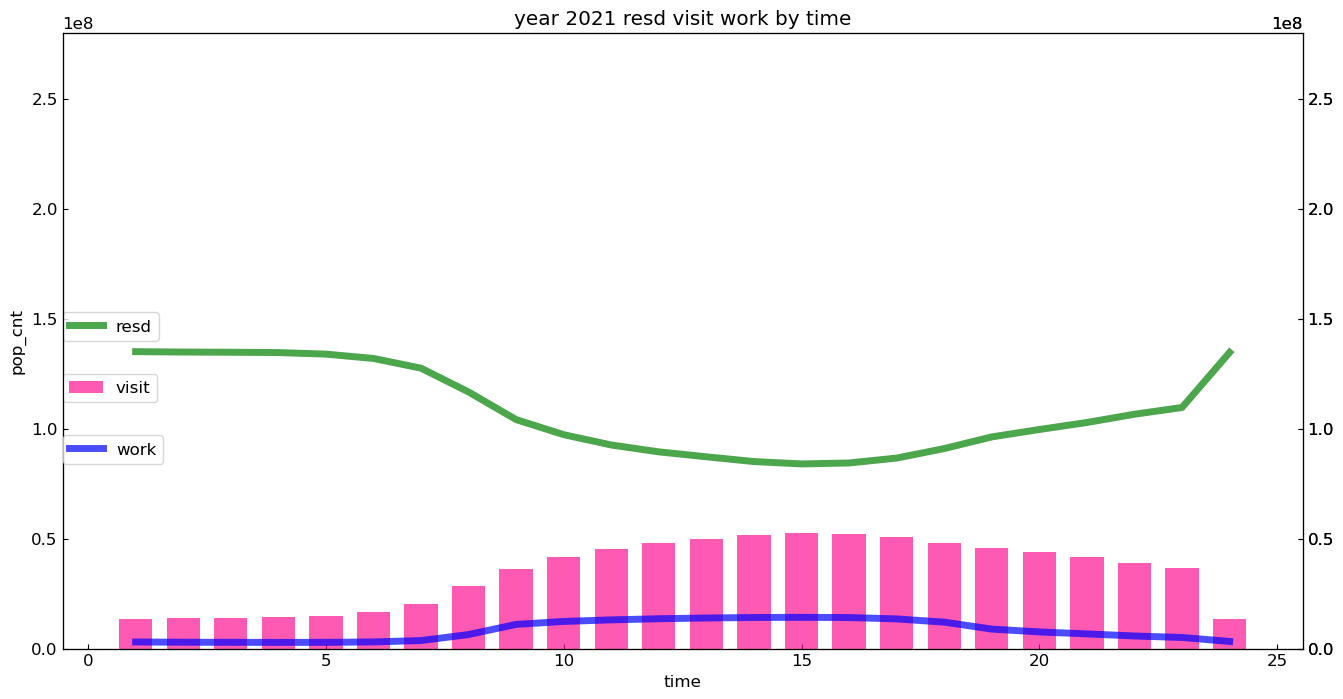

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test21['resd_pop_cnt'])
y2 = np.array(test21['visit_pop_cnt'])
y3 = np.array(test21['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 280000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 280000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 280000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2021 resd visit work by time')
plt.show()

## 년도별 거주인구 비교

In [ ]:
print(test18['resd_pop_cnt'].max(), test18['resd_pop_cnt'].min())
print(test19['resd_pop_cnt'].max(), test19['resd_pop_cnt'].min())
print(test20['resd_pop_cnt'].max(), test20['resd_pop_cnt'].min())
print(test21['resd_pop_cnt'].max(), test21['resd_pop_cnt'].min())

239693706 135964396
240443502 138865931
249215788 158098175
134963428 83935378


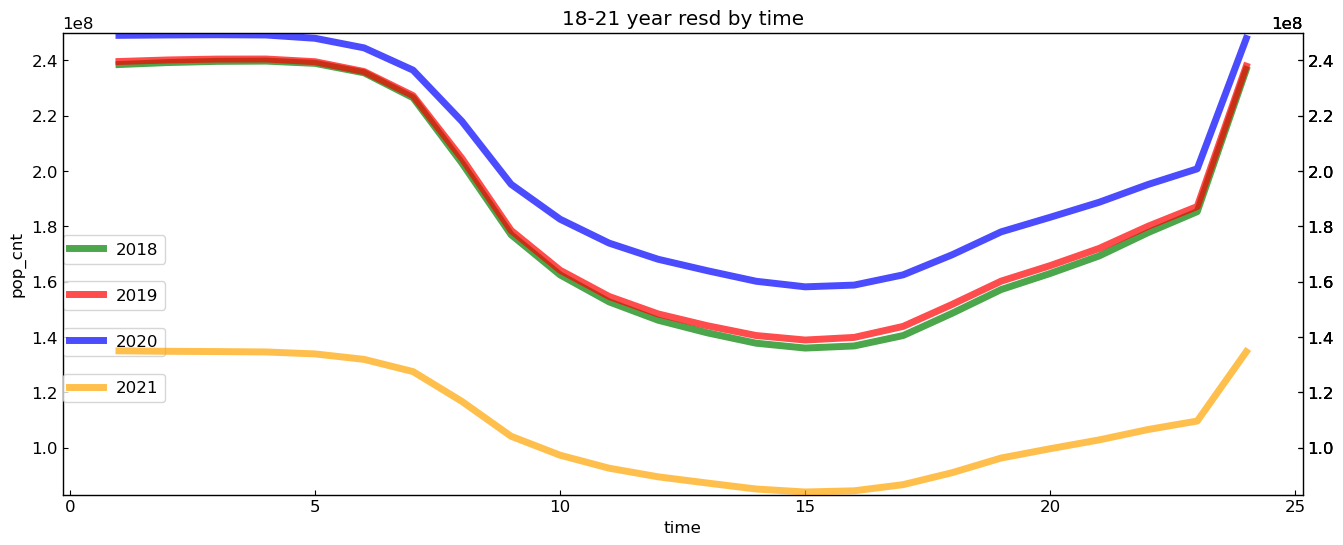

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test18['resd_pop_cnt'])
y2 = np.array(test19['resd_pop_cnt'])
y3 = np.array(test20['resd_pop_cnt'])
y4 = np.array(test21['resd_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='2018')
ax1.set_ylim(83000000, 250000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', markersize=7, linewidth=5, alpha=0.7, label='2019')
ax2.set_ylim(83000000, 250000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='2020')
ax3.set_ylim(83000000, 250000000)
ax3.tick_params(axis='both', direction='in')

ax4 = ax1.twinx()
ax4.plot(x, y4, color='orange', markersize=7, linewidth=5, alpha=0.7, label='2021')
ax4.set_ylim(83000000, 250000000)
ax4.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
ax4.legend(loc=(0, 0.2), ncol=1)
plt.title('18-21 year resd by time')
plt.show()

## 년도별 노동인구 비교

In [ ]:
print(test18['work_pop_cnt'].max(), test18['work_pop_cnt'].min())
print(test19['work_pop_cnt'].max(), test19['work_pop_cnt'].min())
print(test20['work_pop_cnt'].max(), test20['work_pop_cnt'].min())
print(test21['work_pop_cnt'].max(), test21['work_pop_cnt'].min())

34070565 5741971
32836701 5956787
27195508 5909042
14205486 2815585


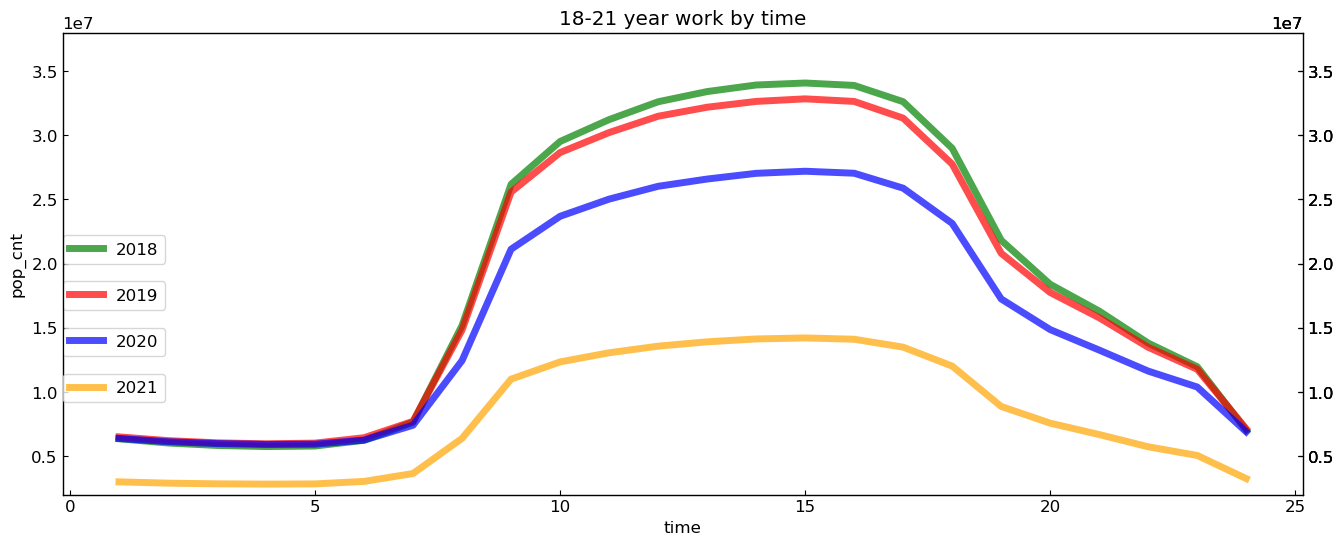

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test18['work_pop_cnt'])
y2 = np.array(test19['work_pop_cnt'])
y3 = np.array(test20['work_pop_cnt'])
y4 = np.array(test21['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='2018')
ax1.set_ylim(2000000, 38000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', markersize=7, linewidth=5, alpha=0.7, label='2019')
ax2.set_ylim(2000000, 38000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='2020')
ax3.set_ylim(2000000, 38000000)
ax3.tick_params(axis='both', direction='in')

ax4 = ax1.twinx()
ax4.plot(x, y4, color='orange', markersize=7, linewidth=5, alpha=0.7, label='2021')
ax4.set_ylim(2000000, 38000000)
ax4.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
ax4.legend(loc=(0, 0.2), ncol=1)
plt.title('18-21 year work by time')
plt.show()

## 년도별 방문인구 비교

In [ ]:
print(test18['visit_pop_cnt'].max(), test18['visit_pop_cnt'].min())
print(test19['visit_pop_cnt'].max(), test19['visit_pop_cnt'].min())
print(test20['visit_pop_cnt'].max(), test20['visit_pop_cnt'].min())
print(test21['visit_pop_cnt'].max(), test21['visit_pop_cnt'].min())

102940680 29684075
102477848 30086961
98165145 29776546
52572443 13571605


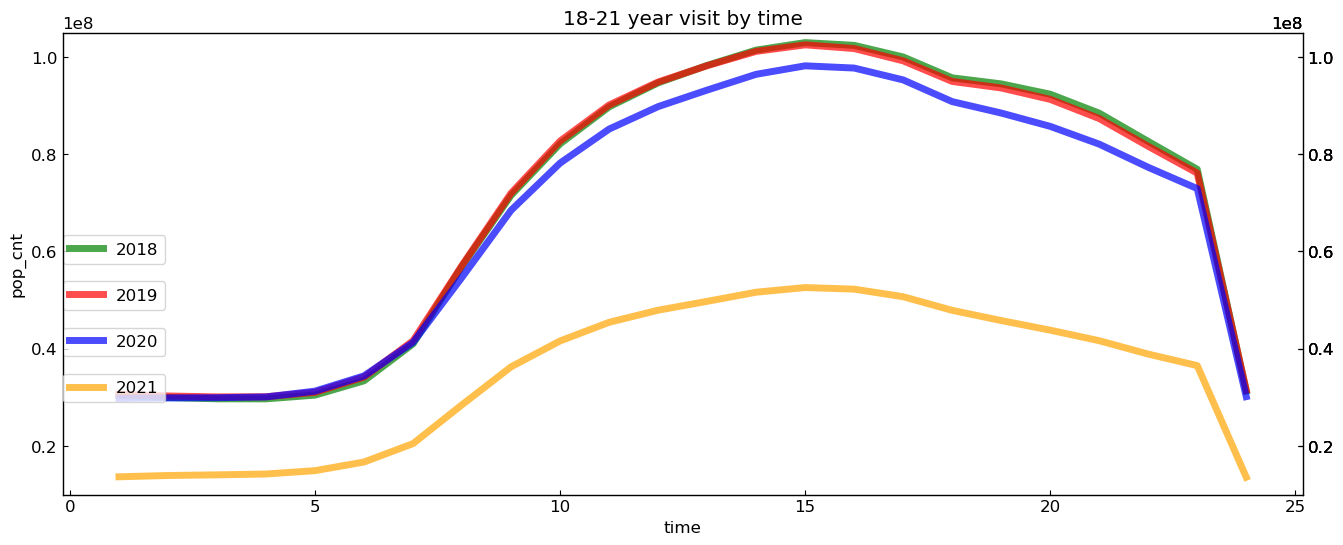

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test18['visit_pop_cnt'])
y2 = np.array(test19['visit_pop_cnt'])
y3 = np.array(test20['visit_pop_cnt'])
y4 = np.array(test21['visit_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='2018')
ax1.set_ylim(10000000, 105000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', markersize=7, linewidth=5, alpha=0.7, label='2019')
ax2.set_ylim(10000000, 105000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='2020')
ax3.set_ylim(10000000, 105000000)
ax3.tick_params(axis='both', direction='in')

ax4 = ax1.twinx()
ax4.plot(x, y4, color='orange', markersize=7, linewidth=5, alpha=0.7, label='2021')
ax4.set_ylim(10000000, 105000000)
ax4.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
ax4.legend(loc=(0, 0.2), ncol=1)
plt.title('18-21 year visit by time')
plt.show()

## 년도&월별&인구별 추세 파악

In [ ]:
test18m = test02[test02['year']==2018]
test18m = test18m.groupby(['month']).sum()
test19m = test02[test02['year']==2019]
test19m = test19m.groupby(['month']).sum()
test20m = test02[test02['year']==2020]
test20m = test20m.groupby(['month']).sum()
test21m = test02[test02['year']==2021]
test21m = test21m.groupby(['month']).sum()

In [ ]:
print('resd pop-----------------------------------------')
print(test18m['resd_pop_cnt'].max(), test18m['resd_pop_cnt'].min())
print(test19m['resd_pop_cnt'].max(), test19m['resd_pop_cnt'].min())
print(test20m['resd_pop_cnt'].max(), test20m['resd_pop_cnt'].min())
print(test21m['resd_pop_cnt'].max(), test21m['resd_pop_cnt'].min())
print('work pop-----------------------------------------')
print(test18m['work_pop_cnt'].max(), test18m['work_pop_cnt'].min())
print(test19m['work_pop_cnt'].max(), test19m['work_pop_cnt'].min())
print(test20m['work_pop_cnt'].max(), test20m['work_pop_cnt'].min())
print(test21m['work_pop_cnt'].max(), test21m['work_pop_cnt'].min())
print('visit pop-----------------------------------------')
print(test18m['visit_pop_cnt'].max(), test18m['visit_pop_cnt'].min())
print(test19m['visit_pop_cnt'].max(), test19m['visit_pop_cnt'].min())
print(test20m['visit_pop_cnt'].max(), test20m['visit_pop_cnt'].min())
print(test21m['visit_pop_cnt'].max(), test21m['visit_pop_cnt'].min())

resd pop-----------------------------------------
386893276 347022522
388641508 350106568
454450114 371077791
468581551 411723833
work pop-----------------------------------------
44345063 28342165
44319027 28548656
38552174 27489187
39771056 25238661
visit pop-----------------------------------------
153083387 126360786
151883415 129120943
144134763 124168180
150786521 128368530


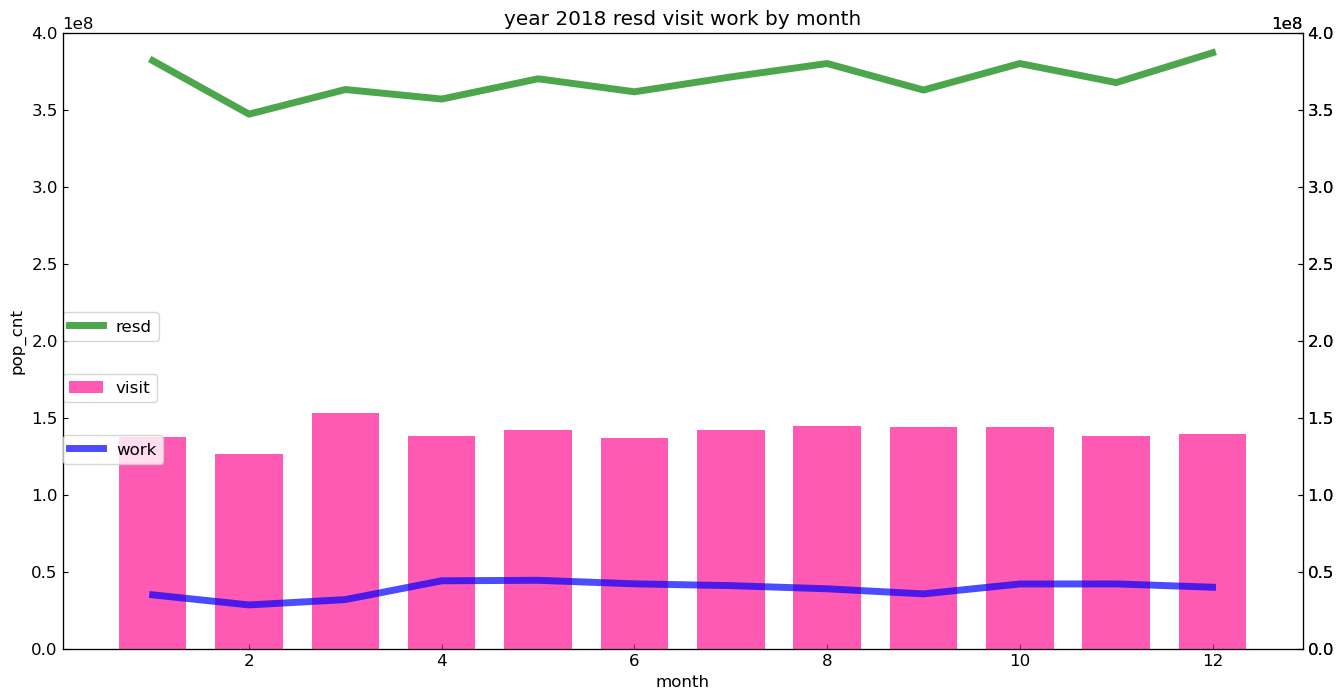

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 13)
y1 = np.array(test18m['resd_pop_cnt'])
y2 = np.array(test18m['visit_pop_cnt'])
y3 = np.array(test18m['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 400000000)
ax1.set_xlabel('month')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 400000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 400000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2018 resd visit work by month')
plt.show()

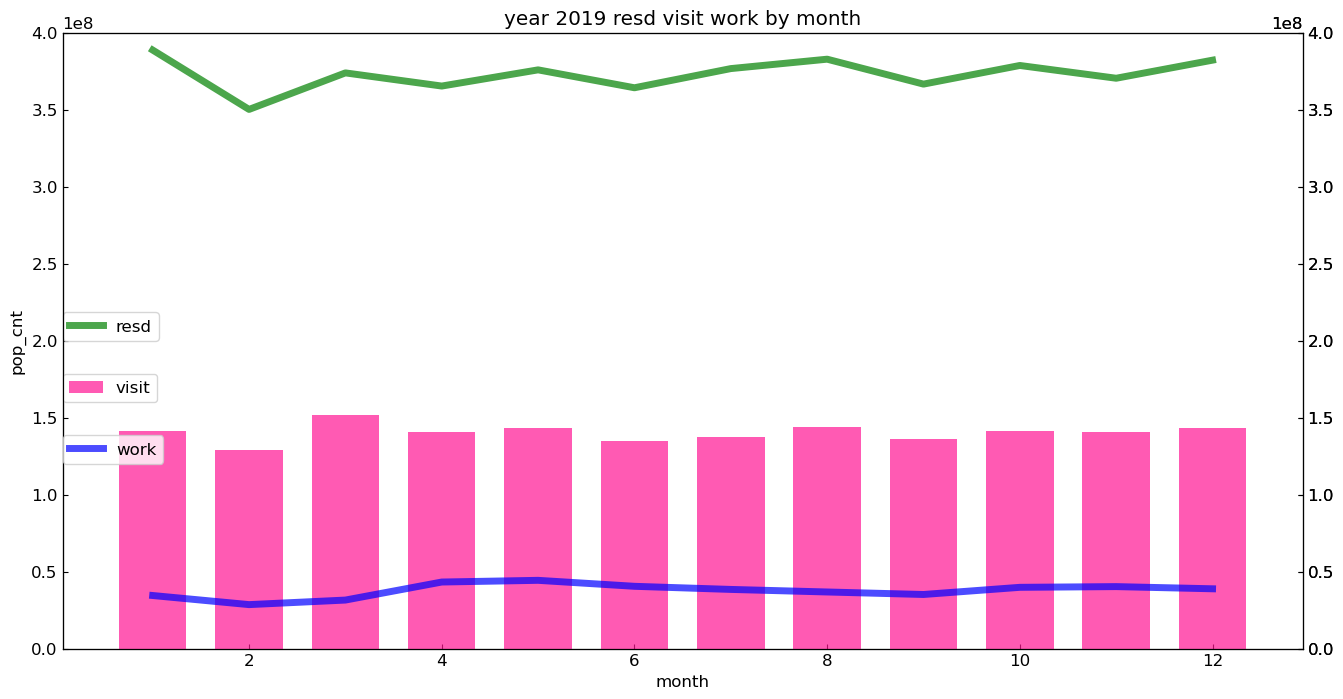

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 13)
y1 = np.array(test19m['resd_pop_cnt'])
y2 = np.array(test19m['visit_pop_cnt'])
y3 = np.array(test19m['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 400000000)
ax1.set_xlabel('month')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 400000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 400000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2019 resd visit work by month')
plt.show()

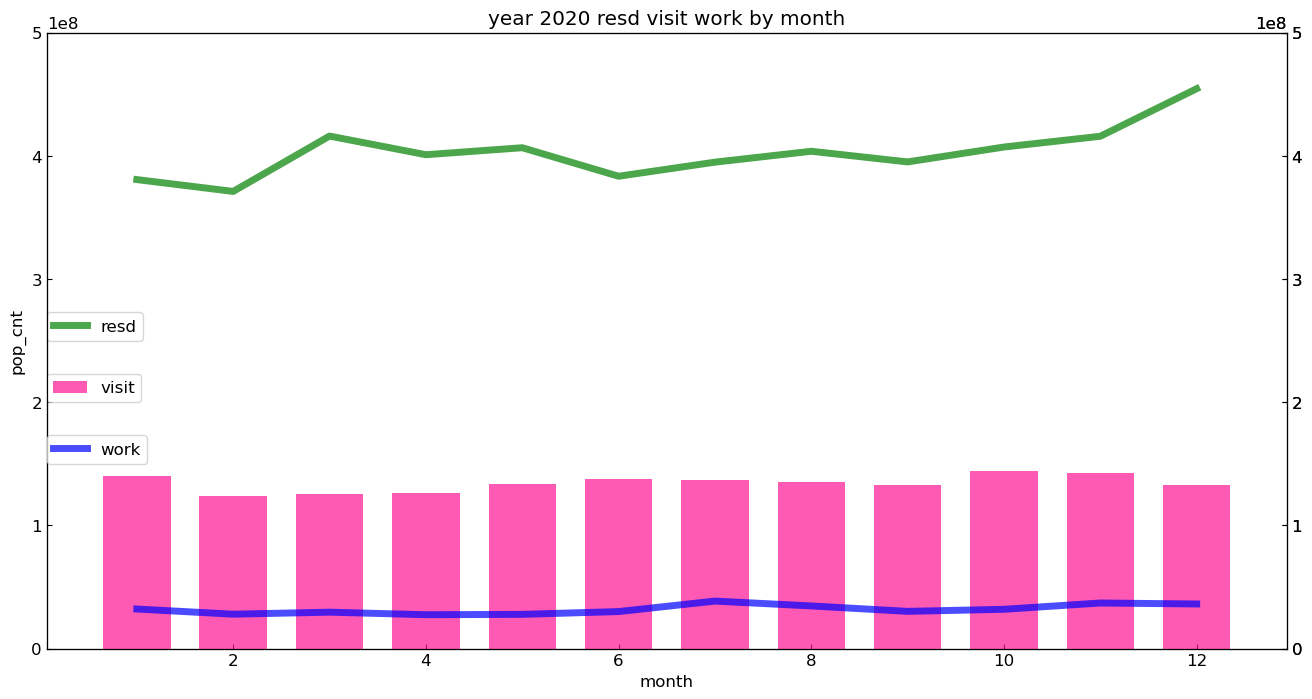

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 13)
y1 = np.array(test20m['resd_pop_cnt'])
y2 = np.array(test20m['visit_pop_cnt'])
y3 = np.array(test20m['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 500000000)
ax1.set_xlabel('month')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 500000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 500000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2020 resd visit work by month')
plt.show()

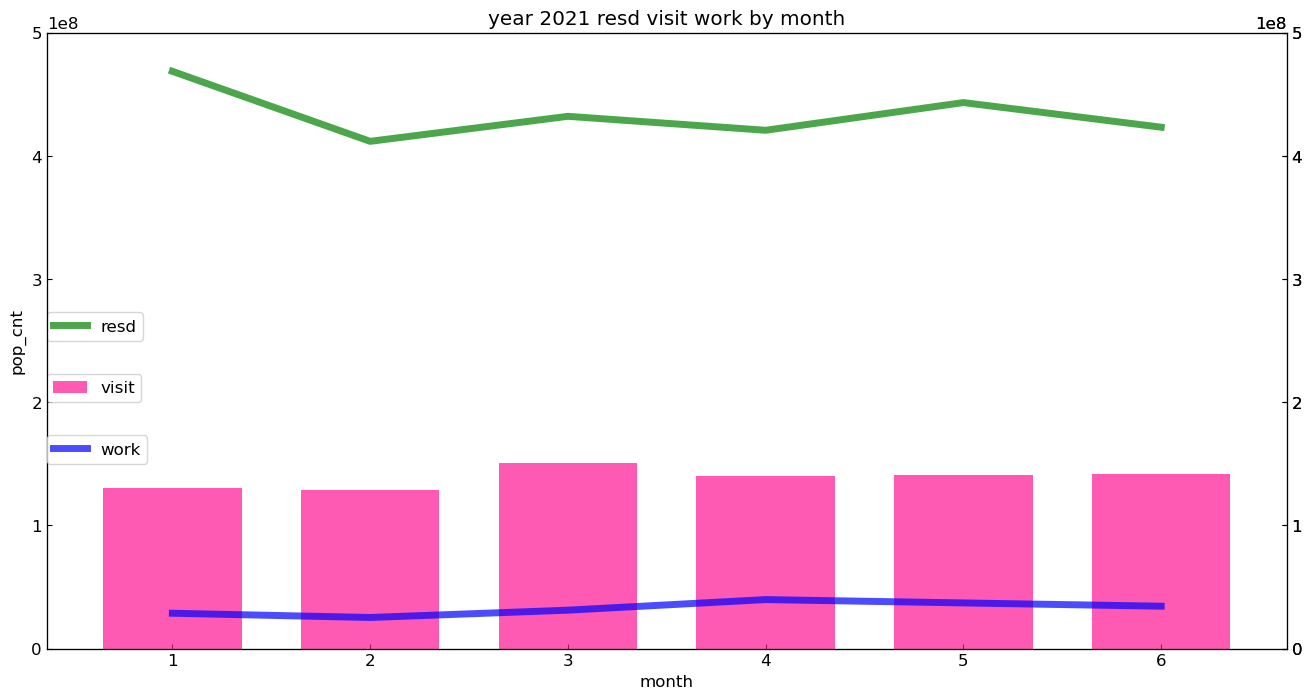

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 7)
y1 = np.array(test21m['resd_pop_cnt'])
y2 = np.array(test21m['visit_pop_cnt'])
y3 = np.array(test21m['work_pop_cnt'])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 500000000)
ax1.set_xlabel('month')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 500000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 500000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
plt.title('year 2021 resd visit work by month')
plt.show()

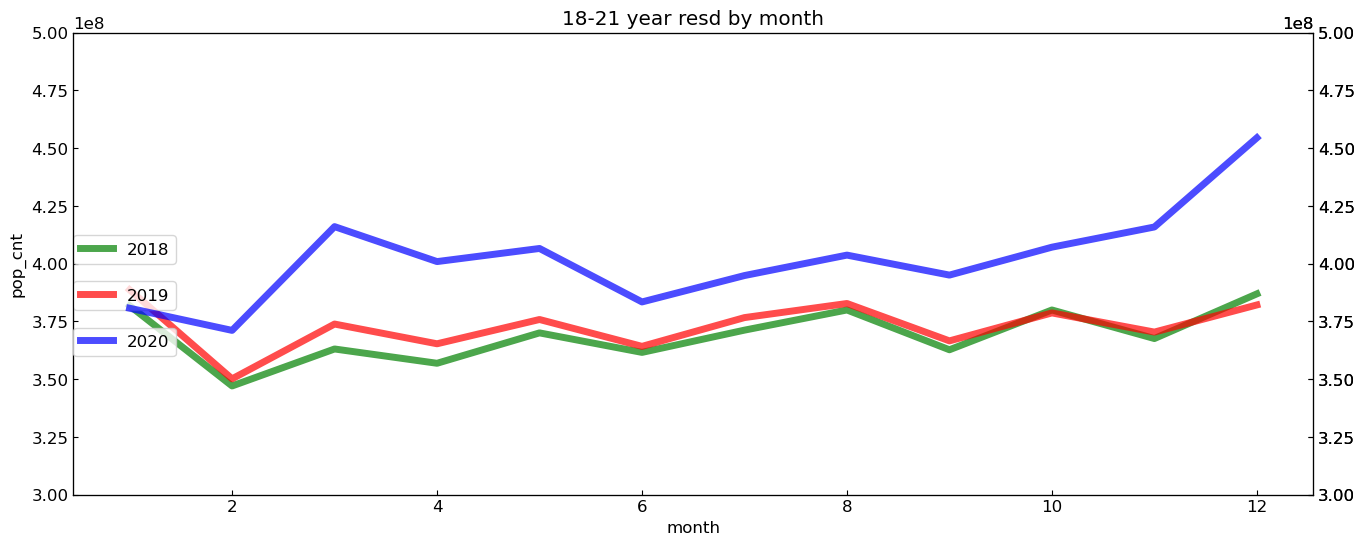

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 13)
y1 = np.array(test18m['resd_pop_cnt'])
y2 = np.array(test19m['resd_pop_cnt'])
y3 = np.array(test20m['resd_pop_cnt'])
# y4 = np.array(test21m['resd_pop_cnt'],[0,0,0,0,0,0])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='2018')
ax1.set_ylim(300000000, 500000000)
ax1.set_xlabel('month')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', markersize=7, linewidth=5, alpha=0.7, label='2019')
ax2.set_ylim(300000000, 500000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='2020')
ax3.set_ylim(300000000, 500000000)
ax3.tick_params(axis='both', direction='in')

# ax4 = ax1.twinx()
# ax4.plot(x, y4, color='orange', markersize=7, linewidth=5, alpha=0.7, label='2021')
# ax4.set_ylim(300000000, 500000000)
# ax4.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
# ax4.legend(loc=(0, 0.2), ncol=1)
plt.title('18-21 year resd by month')
plt.show()

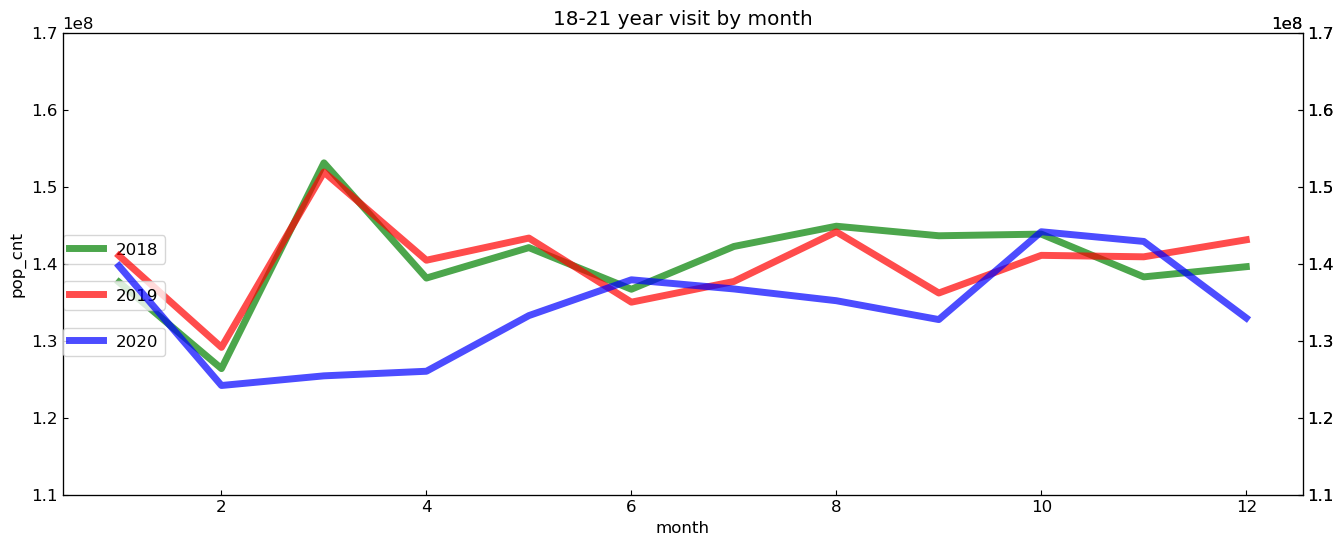

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 13)
y1 = np.array(test18m['visit_pop_cnt'])
y2 = np.array(test19m['visit_pop_cnt'])
y3 = np.array(test20m['visit_pop_cnt'])
# y4 = np.array(test21m['resd_pop_cnt'],[0,0,0,0,0,0])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='2018')
ax1.set_ylim(110000000, 170000000)
ax1.set_xlabel('month')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', markersize=7, linewidth=5, alpha=0.7, label='2019')
ax2.set_ylim(110000000, 170000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='2020')
ax3.set_ylim(110000000, 170000000)
ax3.tick_params(axis='both', direction='in')

# ax4 = ax1.twinx()
# ax4.plot(x, y4, color='orange', markersize=7, linewidth=5, alpha=0.7, label='2021')
# ax4.set_ylim(300000000, 500000000)
# ax4.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
# ax4.legend(loc=(0, 0.2), ncol=1)
plt.title('18-21 year visit by month')
plt.show()

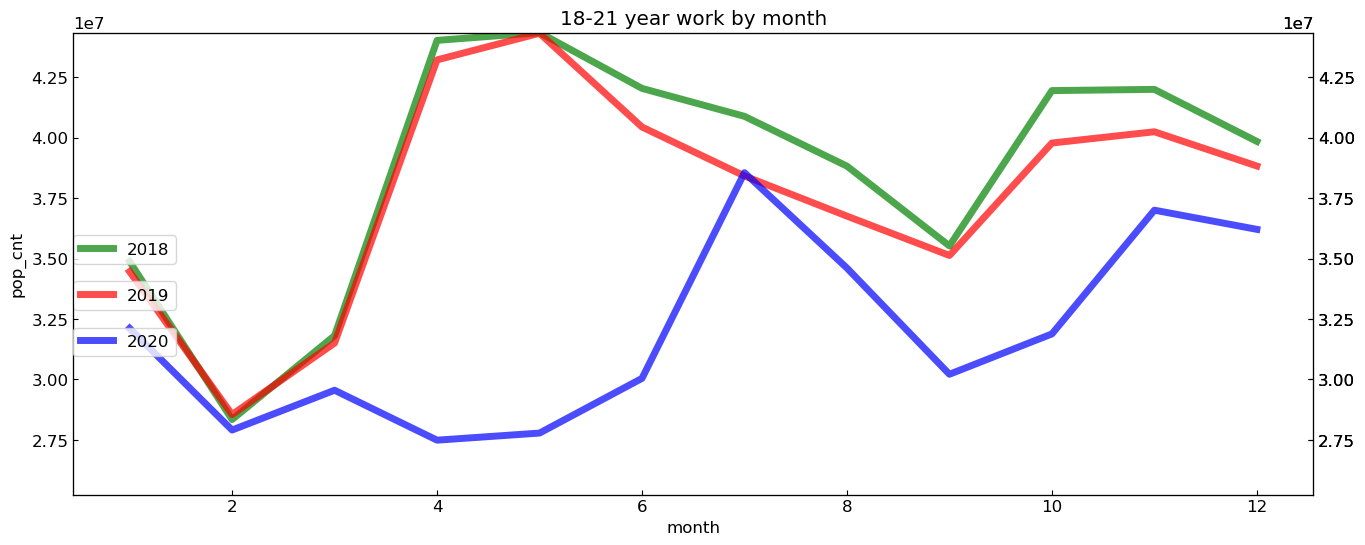

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 13)
y1 = np.array(test18m['work_pop_cnt'])
y2 = np.array(test19m['work_pop_cnt'])
y3 = np.array(test20m['work_pop_cnt'])
# y4 = np.array(test21m['resd_pop_cnt'],[0,0,0,0,0,0])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='2018')
ax1.set_ylim(25238661, 44346063)
ax1.set_xlabel('month')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', markersize=7, linewidth=5, alpha=0.7, label='2019')
ax2.set_ylim(25238661, 44346063)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='2020')
ax3.set_ylim(25238661, 44346063)
ax3.tick_params(axis='both', direction='in')

# ax4 = ax1.twinx()
# ax4.plot(x, y4, color='orange', markersize=7, linewidth=5, alpha=0.7, label='2021')
# ax4.set_ylim(300000000, 500000000)
# ax4.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)
# ax4.legend(loc=(0, 0.2), ncol=1)
plt.title('18-21 year work by month')
plt.show()